# Importing a database


* So, let's get started!

In [1]:
print ("hello! you are beautiful")

hello! you are beautiful


* Set the environment and libraries, and open the test database 

In [2]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt



conn = sqlite3.connect("./Downloads/Comp2Sample.sqlite")

cur = conn.cursor()



* Let's have a look at the content

In [3]:
df = pd.read_sql_query("SELECT * FROM CONTRIBUTORS", conn)

df

,id,last_name,first_name,city,state,zip,amount
0,1,Winfrey,Oprah,Chicago,IL,60601,500
1,2,Chambers,Anne Cox,Atlanta,GA,30301,200
2,3,Cathy,S. Truett,Atlanta,GA,30301,1200
3,4,Hamed,Haddadi,London,UK,SW7,100


* Let's print the amount from each contributor

In [4]:
da = pd.read_sql_query("SELECT id FROM contributors", conn)
da

,id
0,1
1,2
2,3
3,4


* And now print the histogram of this

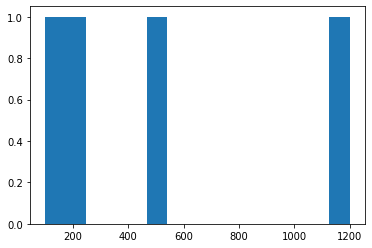

In [5]:

n, bins, patches = plt.hist(x=df.amount, bins=15)

* What was the bigget contribution ?

In [6]:
da = pd.read_sql_query("SELECT MAX(amount) FROM contributors;", conn)
da



,MAX(amount)
0,1200


In [7]:
dc = pd.read_sql_query("SELECT count(amount) FROM contributors;", conn)
dc

,count(amount)
0,4


* How many contributors gave more than 200?

In [8]:
dcrich = pd.read_sql_query("SELECT count(amount) FROM contributors WHERE amount > 200;", conn)
dcrich

,count(amount)
0,2


* So, how many distinct postcodes were there?

In [9]:
dczip = pd.read_sql_query("SELECT count(DISTINCT zip) FROM contributors;", conn)
dczip

,count(DISTINCT zip)
0,3


* don't forget to close the DB.

In [10]:
conn.close()

* Now let's try a new database, and inspect its tables.

In [11]:
con = sqlite3.connect('./Downloads/chinook.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]


In [12]:
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)
print(table)

               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


* You can also inspect the schema

In [13]:
table = pd.read_sql_query("select sql from sqlite_master where type='table';", con)
print(table)

                                                  sql
0   CREATE TABLE "albums"\r\n(\r\n    [AlbumId] IN...
1              CREATE TABLE sqlite_sequence(name,seq)
2   CREATE TABLE "artists"\r\n(\r\n    [ArtistId] ...
3   CREATE TABLE "customers"\r\n(\r\n    [Customer...
4   CREATE TABLE "employees"\r\n(\r\n    [Employee...
5   CREATE TABLE "genres"\r\n(\r\n    [GenreId] IN...
6   CREATE TABLE "invoices"\r\n(\r\n    [InvoiceId...
7   CREATE TABLE "invoice_items"\r\n(\r\n    [Invo...
8   CREATE TABLE "media_types"\r\n(\r\n    [MediaT...
9   CREATE TABLE "playlists"\r\n(\r\n    [Playlist...
10  CREATE TABLE "playlist_track"\r\n(\r\n    [Pla...
11  CREATE TABLE "tracks"\r\n(\r\n    [TrackId] IN...
12            CREATE TABLE sqlite_stat1(tbl,idx,stat)


* So, who are the artists in the DB?

In [14]:
table = pd.read_sql_query("select * from artists", con)
print(table)

     ArtistId                                               Name
0           1                                              AC/DC
1           2                                             Accept
2           3                                          Aerosmith
3           4                                  Alanis Morissette
4           5                                    Alice In Chains
..        ...                                                ...
270       271   Mela Tenenbaum, Pro Musica Prague & Richard Kapp
271       272                             Emerson String Quartet
272       273  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...
273       274                                      Nash Ensemble
274       275                              Philip Glass Ensemble

[275 rows x 2 columns]


In [15]:
df = pd.read_sql_query("SELECT * FROM albums", con)
df

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [16]:
da = pd.read_sql_query("SELECT ArtistId FROM albums", con)
da

,ArtistId
0,1
1,1
2,2
3,2
4,3
...,...
342,271
343,272
344,273
345,274


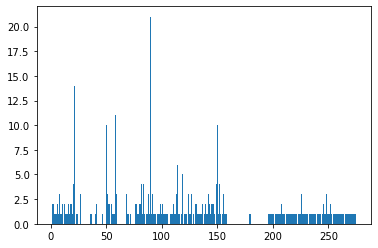

In [17]:
n, bins, patches = plt.hist(x=df.ArtistId, bins=300)

In [18]:
da = pd.read_sql_query("SELECT MAX(bytes) FROM tracks", con)
da

,MAX(bytes)
0,1059546140


* Let's try an inner join!

In [19]:
routes = pd.read_sql_query("SELECT trackid, name, title FROM tracks INNER JOIN albums ON albums.albumid = tracks.albumid;", con)

routes





,TrackId,Name,Title
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
1,6,Put The Finger On You,For Those About To Rock We Salute You
2,7,Let's Get It Up,For Those About To Rock We Salute You
3,8,Inject The Venom,For Those About To Rock We Salute You
4,9,Snowballed,For Those About To Rock We Salute You
...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music


In [20]:
con.close()

##  Some basic exercises:

1. Sort out the bytes in tracks, and plot the sorted columns

2. Find the average contribution from contributors


## Now, a challenge:

* Can you create a DB (or use one of the ones above), and connect your web app to it and read it?